# Задачи к Лекции 2

__Исходные данные__ 

Дан файл **"mlbootcamp5_train.csv"**. В нем содержатся данные об опросе 70000 пациентов с целью определения наличия заболеваний сердечно-сосудистой системы (ССЗ). Данные в файле промаркированы и если у человека имееются ССЗ, то значение **cardio** будет равно 1, в противном случае - 0. Описание и значения полей представлены во второй лекции.

__Загрузка файла__

In [270]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
import warnings
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore')

df = pd.read_csv("../data/mlbootcamp5_train.csv", 
                 sep=";", 
                 index_col="id")
df.head()
df.shape

(70000, 12)

In [271]:
import itertools
class_names = ["Здоров", "Болен"]

def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

## Задачи

**1. Построить наивный байесовский классификатор для количественных полей age, height, weight, ap_hi, ap_lo. Исправить данные, если это необходимо. Привести матрицу неточностей и сравнить со значением полученным в ходе лекции. Попытаться объяснить разницу.**

In [272]:
data =  df[(df["height"] >= 125) & (df["height"] <= 200)]
data =  data[(df["weight"] >= 40) & (data["weight"] <= 130)]
data = data[(data["ap_hi"] >= 50) & (data["ap_hi"] <= 200)]
data = data[(data["ap_lo"] >= 50) & (data["ap_lo"] <= 130)]

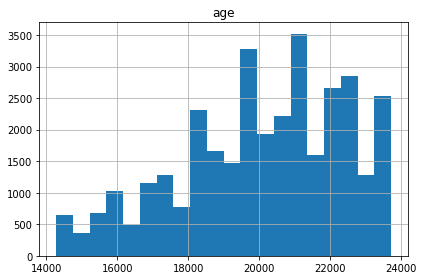

In [273]:
data[data["cardio"] == 1][['age']].hist(bins=20)
plt.tight_layout()


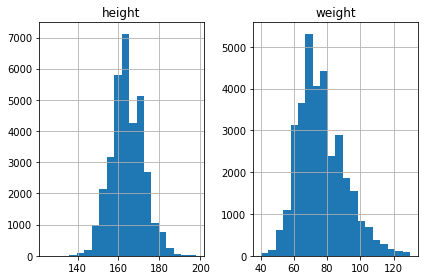

In [274]:
data[data["cardio"] == 1][['height', 'weight']].hist(bins=20)
plt.tight_layout()

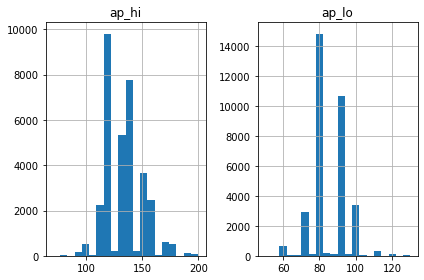

In [275]:
data[data["cardio"] == 1][["ap_hi", "ap_lo"]].hist(bins=20)
plt.tight_layout()

In [285]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

train = data[["age", "weight", "height", "ap_hi", "ap_lo"]]
target = data["cardio"]
print(train.shape)

model = gnb.fit(train, target)
predict1 = model.predict(train)
predict_proba1 = model.predict_proba(train)

print(data.shape[0],
     (target == predict1).sum() / data.shape[0])

predict1

(68333, 5)
0 [0.85756956 0.14243044]
68333 0.709861999326826


array([0, 1, 0, ..., 1, 1, 0])

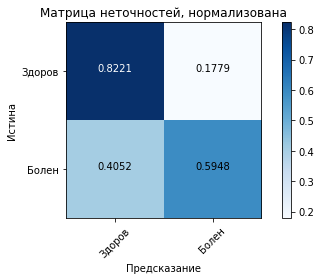

In [277]:
cnf_matrix = confusion_matrix(target, predict1)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()

**Комментарии:** Ваши комментарии здесь.

**2. Написать свой наивный байесовский классификатор для категориальных полей cholesterol, gluc. Привести матрицу неточностей и сравнить со значениями из задачи 1 (нельзя использовать готовое решение из sklearn) (не обязательно)**

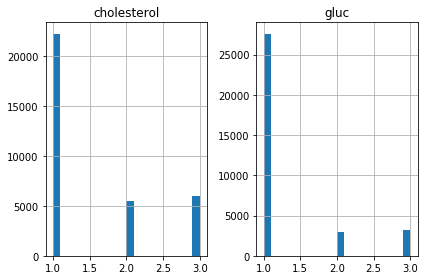

In [278]:
data[data["cardio"] == 1][['cholesterol', 'gluc']].hist(bins=20)
plt.tight_layout()

68333 0.5921882545768516


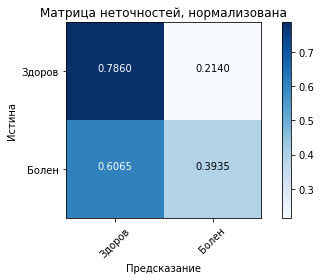

In [279]:
from sklearn.naive_bayes import CategoricalNB
cnb = CategoricalNB()

train = data[['cholesterol', 'gluc']]
target = data["cardio"]


model = cnb.fit(train, target)
predict2 = model.predict(train)
predict_proba2 = model.predict_proba(train)
print(data.shape[0],
     (target == predict2).sum() / data.shape[0])

cnf_matrix = confusion_matrix(target, predict2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()

**Комментарии:** Ваши комментарии здесь.

**3. Построить наивный байесовский классификатор для бинарных полей gender, smoke, alco, active. Привести матрицу неточностей и сравнить с предыдущими значениями.**

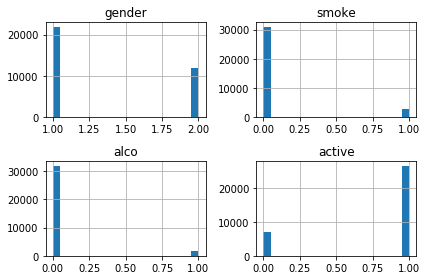

In [280]:
data[data["cardio"] == 1][['gender', 'smoke', 'alco', 'active']].hist(bins=20)
plt.tight_layout()

In [282]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

train = data[['gender', 'smoke', 'alco', 'active']]
target = data["cardio"]


model = bnb.fit(train, target)
predict3 = model.predict(train)
predict_proba3 = model.predict_proba(train)
print(data.shape[0],
     (target == predict3).sum() / data.shape[0])


68333 0.5182415523978166


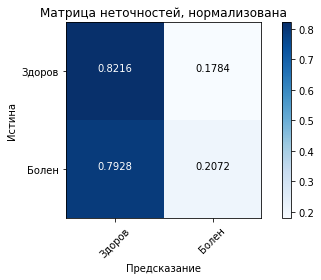

In [283]:
cnf_matrix = confusion_matrix(target, predict3)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()

**Комментарии:** Ваши комментарии здесь.

**4. К этому моменту у вас есть три независимых классификатора: по количественным полям, категориальным и бинарным. Придумать, как их объединить в один единый классификатор, который учитывает все эти поля. Привести матрицу неточностей для него и сравнить с предыдущими значениями. Попытаться объяснить разницу.**

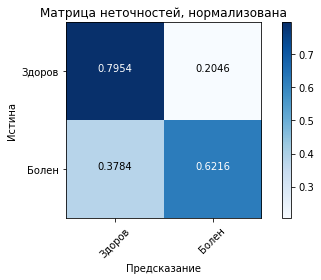

In [329]:
l = len(predict3)
pred_all = []
for i in range(l):
        
    summ = 0.5 * predict1[i] + 0.3 * predict2[i] + 0.2 * predict3[i]
    if summ >= 0.5:
        pred_all.append(1)
    else:
        pred_all.append(0)
    
cnf_matrix = confusion_matrix(target, pred_all)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()

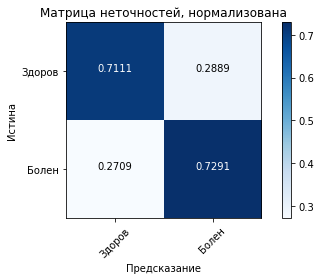

68333 0.719959609559071


In [335]:
pred_proba_all = []
for i in range(l):
    summ = 0.4 * predict_proba1[i][1] + 0.4 * predict_proba2[i][1] + 0.3 * predict_proba3[i][1]
    if summ >= 0.48:
        pred_proba_all.append(1)
    else:
        pred_proba_all.append(0)
    
print()
cnf_matrix = confusion_matrix(target, pred_proba_all)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()
print(data.shape[0],
     (target == pred_proba_all).sum() / l)

In [341]:
coeff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
pred_proba_all = []
p = 0.5
for c1 in coeff:
    print(c1)
    for c2 in coeff:
        for c3 in coeff:
            for i in range(l):
                summ = c1 * predict_proba1[i][1] + c2 * predict_proba2[i][1] + c3 * predict_proba3[i][1]
                if summ >= 0.48:
                     pred_proba_all.append(1)
                else:
                     pred_proba_all.append(0)
            
            p_new = (target == pred_proba_all).sum() / l
            if p_new > p:
                c = [c1, c2, c3]
                p = p_new
            pred_proba_all = []
            print(p)
print(c, p)           

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9
[0.2, 0.2, 0.6] 0.723193771676935


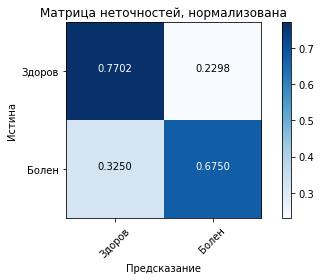

68333 0.723193771676935


In [342]:
pred_proba_all = []
for i in range(l):
    summ = 0.2 * predict_proba1[i][1] + 0.2 * predict_proba2[i][1] + 0.6 * predict_proba3[i][1]
    #summ =( predict_proba1[i][1] +predict_proba2[i][1] + predict_proba3[i][1])/3
    if summ >= 0.48:
        pred_proba_all.append(1)
    else:
        pred_proba_all.append(0)
    
print()
cnf_matrix = confusion_matrix(target, pred_proba_all)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()
print(data.shape[0],
     (target == pred_proba_all).sum() / l)

In [323]:
prp1 = np.array(predict_proba1)
tr1 = np.transpose(prp)[1]
prp2 = np.array(predict_proba2)
tr2 = np.transpose(prp2)[1]
prp3 = np.array(predict_proba3)
tr3 = np.transpose(prp3)[1]


pred_df = pd.DataFrame({
                        'pred_proba1' : tr1,
                        'pred_proba2' : tr2,
                        'pred_proba3' : tr3,
                        'target': target})

pred_df.head(5)

,pred_proba1,pred_proba2,pred_proba3,target
id,,,,
99993,0.280161,0.416172,0.458874,0
99995,0.993280,0.681076,0.488153,1
99996,0.999940,0.747646,0.515931,1
99998,0.648616,0.527246,0.535095,1
99999,0.311242,0.577159,0.488153,0


**Комментарии:** Ваши комментарии здесь.

**5. (Не обязательно) Теперь мы умеем делать классификацию в рамках наивного предположения об независимости всех признаков. Сейчас же нужно попробовать учесть взаимосвязь между признаками через условные вероятности. Построить классификатор с учетом такой связи. Сравнить результат с ранее полученными значениями.**

In [3]:
# A lot of code here

**Комментарии:** Ваши комментарии здесь.